In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torch.autograd import Variable
import numpy as np

In [2]:
# Set the device (CPU or GPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device: ", device)

# Set the hyperparameters
batch_size = 32
num_epochs = 50
learning_rate = 0.0002
betas = (0.5, 0.999)

Using device:  cpu


In [3]:
transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
])

train_data = datasets.ImageFolder(root="./datas/", transform=transform)
loader = DataLoader(train_data, batch_size=batch_size, shuffle=True, num_workers=4)

In [4]:
image =next(iter(train_data)) # values -1 to 1

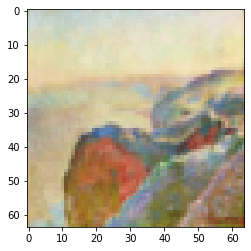

In [5]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

Norm_image = image[0]/2 + 0.5 # normalize it back 0 to 1
Norm_image = np.transpose(Norm_image, (1, 2, 0)) # (H, W, channels = 3)
plt.imshow(Norm_image)
plt.show()


In [7]:
from models64 import Generator, Discriminator, initialize_weights

LEARNING_RATE = 5e-4
IMAGE_SIZE = 64
CHANNELS_IMG = 3
Z_DIM = 100
NUM_EPOCHS = 5
FEATURES_DISC = 64
FEATURES_GEN = 64

gen = Generator(Z_DIM, CHANNELS_IMG, FEATURES_GEN).to(device)
disc = Discriminator(CHANNELS_IMG, FEATURES_GEN).to(device)
initialize_weights(gen)
initialize_weights(disc)

opt_gen = optim.Adam(gen.parameters(), lr=LEARNING_RATE, betas=betas)
opt_disc = optim.Adam(disc.parameters(), lr=LEARNING_RATE, betas=betas)
criterion = nn.BCELoss()

torch.Size([8, 1, 1, 1])
torch.Size([8, 3, 64, 64])


In [24]:
for epoch in range(NUM_EPOCHS):
    for batch_idx, (real, _) in enumerate(loader):
        real = real.to(device)
        noise = torch.randn((batch_size, Z_DIM, 1, 1)).to(device)
        fake = gen(noise)

        
        #training disc
        disc_real = disc(real).reshape(-1)
        loss_disc_real = criterion(disc_real, torch.ones_like(disc_real))
        disc_fake = disc(fake).reshape(-1)
        loss_disc_fake = criterion(disc_fake, torch.zeros_like(disc_fake))
        loss_disc = (loss_disc_fake + loss_disc_real)/2
        disc.zero_grad()
        loss_disc.backward(retain_graph=True)
        opt_disc.step()

        # training gen
        output = disc(fake).reshape(-1)
        loss_gen = criterion(output, torch.ones_like(output))
        gen.zero_grad()
        loss_gen.backward()
        opt_gen.step()
        with torch.no_grad():
            loss_gen_after = criterion(disc(gen(noise)).reshape(-1), torch.ones_like(output))

        print(f"Epoch [{epoch}/{NUM_EPOCHS}] Batch [{batch_idx}/{len(loader)}]\n")
        print(f"Loss D: {loss_disc:.4f}, Loss G: {loss_gen:.4f} Loss G After: {loss_gen_after:.4f} is it Decreasing: {loss_gen>loss_gen_after}\n")

        

Epoch [0/5] Batch [0/10]

Loss D: 1.1123, Loss G: 1.0182 Loss G After: 0.4895 is it Decreasing: True

Epoch [0/5] Batch [1/10]

Loss D: 0.9470, Loss G: 1.3589 Loss G After: 0.8558 is it Decreasing: True

Epoch [0/5] Batch [2/10]

Loss D: 0.8079, Loss G: 1.2522 Loss G After: 0.6766 is it Decreasing: True

Epoch [0/5] Batch [3/10]

Loss D: 0.8026, Loss G: 1.3453 Loss G After: 0.8766 is it Decreasing: True

Epoch [0/5] Batch [4/10]

Loss D: 0.6705, Loss G: 1.2898 Loss G After: 0.8810 is it Decreasing: True

Epoch [0/5] Batch [5/10]

Loss D: 0.7184, Loss G: 1.2176 Loss G After: 0.8405 is it Decreasing: True

Epoch [0/5] Batch [6/10]

Loss D: 0.6681, Loss G: 1.2782 Loss G After: 0.9606 is it Decreasing: True

Epoch [0/5] Batch [7/10]

Loss D: 0.5457, Loss G: 1.3188 Loss G After: 0.8025 is it Decreasing: True

Epoch [0/5] Batch [8/10]

Loss D: 0.4934, Loss G: 1.7034 Loss G After: 1.2007 is it Decreasing: True

Epoch [0/5] Batch [9/10]

Loss D: 0.5854, Loss G: 1.4540 Loss G After: 0.6651 is i

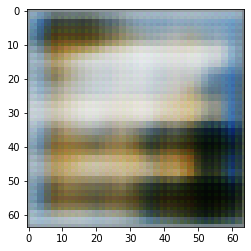

In [44]:
#sample
from models64 import Generator
gen = Generator(100, 3, 64)
gen.load_state_dict(torch.load('gen64.pt'))
noise = torch.randn((1, 100, 1, 1)).to(device)
fake_img = gen(noise)

Norm_image = fake_img[0]/2 + 0.5 # normalize it back 0 to 1
Norm_image = np.transpose(Norm_image.detach().numpy(), (1, 2, 0)) # (H, W, channels = 3)
plt.imshow(Norm_image)
plt.show()



In [35]:
torch.save(gen.state_dict(),'gen64.pt')